In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import os
import psutil
def filename_check(filename):
    if filename.endswith('.csv'):
        print("Расширение файла подходит.")
    else:
        print("Не то расширение файла.")
        
def emptyfile_check(file):
    if file.empty:
        print("Файл пустой.")
    else:
        print("Файл не пустой, данные в порядке.")
        
def emptycells_check(data):
    if data.isnull().values.any():
        print("В файле пустые ячейки.")
    else:
        print("Все в порядке, в файле нет пустых ячеек.")
        
def memory_treshold(filename):
    file_size = os.path.getsize(filename)
    svmem = psutil.virtual_memory()
    if svmem.available >= file_size:
        print(f"Достаточно оперативной памяти для обработки файла размером {file_size} байт.")
    else:
        print(f"Недостаточно оперативной памяти для обработки файла размером {file_size} байт.")

In [3]:
filepath = r"C:\Users\79263\Desktop\Boston (lab4).csv"
filename_check(filepath)
memory_treshold(filepath)
boston_df = pd.read_csv(filepath, index_col=0)
emptyfile_check(boston_df)
emptycells_check(boston_df)
boston_df.head()

Расширение файла подходит.
Достаточно оперативной памяти для обработки файла размером 37658 байт.
Файл не пустой, данные в порядке.
Все в порядке, в файле нет пустых ячеек.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Параметры датасета:

1. CRIM: Это переписываемая преступность на душу населения в городах.

2. ZN: Доля земель, зонированных для жилой застройки с площадью более 25 000 кв. футов.

3. INDUS: Доля акров, используемых под не-розничное бизнес-землепользование в каждом городе.

4. CHAS: Фиктивная переменная для указания, ограничивает ли участок реку Чарльз (1, если участок ограничивает реку, 0 в противном случае).

5. NOX: Концентрация оксидов азота (в долях на 10 миллионов) в воздухе.

6. RM: Среднее количество комнат в каждом жилом помещении.

7. AGE: Доля владельческих единиц, построенных до 1940 года.

8. DIS: Взвешенные расстояния до пяти центров занятости в Бостоне.

9. RAD: Индекс доступности к радиальным автодорогам.

10. TAX: Ставка налога на недвижимость в полном объеме за каждые $10,000.

11. PTRATIO: Отношение учеников к учителям в городах.

12. B: 1000(Bk - 0.63)^2, где Bk - доля афроамериканского населения в городе.

13. LSTAT: Процент населения с низким статусом.

14. MEDV: Медианная стоимость собственности, занимаемой владельцами, в тысячах долларов.

# Linear Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
from ipywidgets import interact, widgets
from IPython.display import display
def plot_scatterplot(x_col, y_col):
    plt.scatter(boston_df[x_col], boston_df[y_col], s=7, c='#536DFE')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Scatterplot of {x_col} vs. {y_col}")
    
    sns.regplot(x=x_col, y=y_col, data=boston_df, scatter=False, color='red')
    
    plt.show()

x_widget = widgets.Dropdown(options=boston_df.columns, description="X-axis:")
y_widget = widgets.Dropdown(options=boston_df.columns, description="Y-axis:")

interact(plot_scatterplot, x_col=x_widget, y_col=y_widget)

interactive(children=(Dropdown(description='X-axis:', options=('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'ag…

<function __main__.plot_scatterplot(x_col, y_col)>

In [6]:
y_medv = boston_df['medv'].values.reshape(-1,1)
#y_crime = boston_df['crime'].values.reshape(-1,1)
x = boston_df['lstat'].values.reshape(-1,1)

model = LinearRegression().fit(x, y_medv)
predicted_medv = model.predict(x)
#model2 = LinearRegression().fit(x, y_crime)
#predicted_crime = model2.predict(x)

Enter parametr for prediction median property value: 32
Prediction: [[4.15226156]]


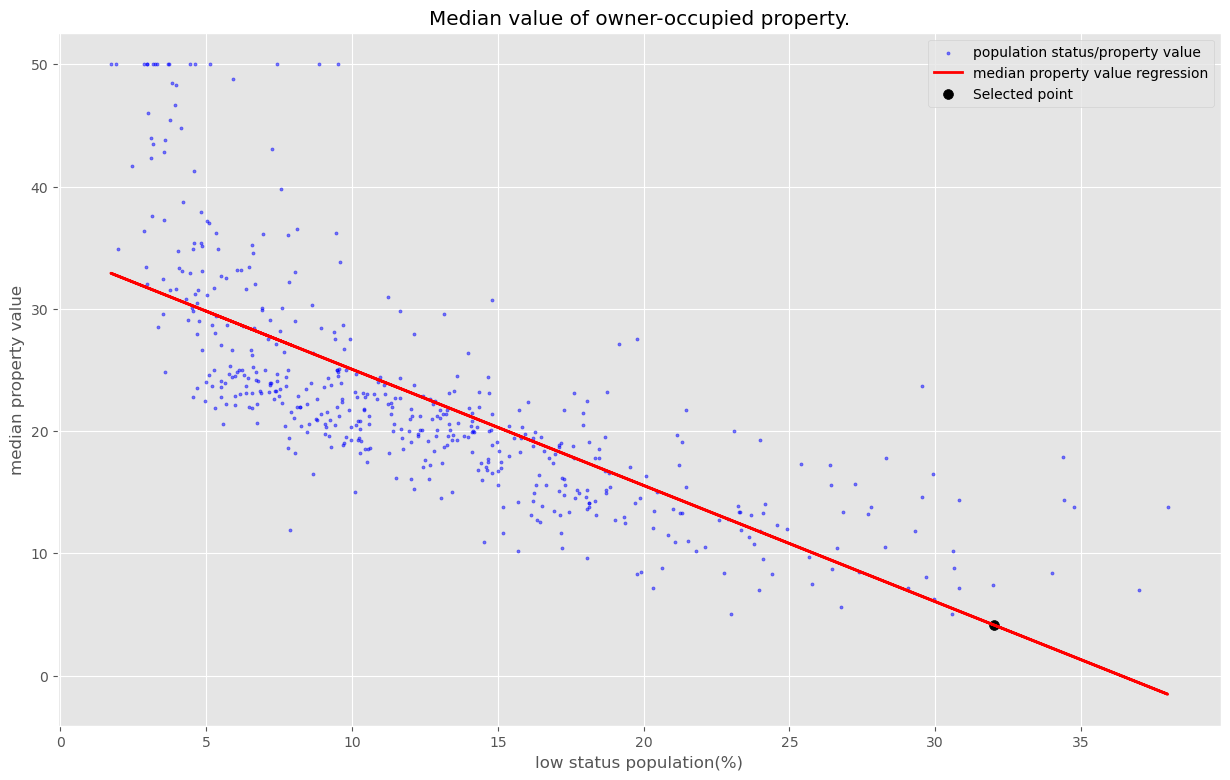

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 9))
plt.scatter(x, y_medv, s = 5, color = "blue", label = "population status/property value", alpha = 0.5)
plt.plot(x, predicted_medv, color='red', label = "median property value regression", linewidth = 2)
#plt.plot(x, predicted_crime, color='orange', label = "crime regression", linewidth = 2)
plt.title('Median value of owner-occupied property.')
plt.xlabel('low status population(%)')
plt.ylabel('median property value')


param = int(input("Enter parametr for prediction median property value: "))
array = np.array([[param]])
print(f"Prediction: {model.predict(array)}")
plt.scatter([param], model.predict(array), s=50, color='black', label='Selected point')
plt.legend()

# Implementation


### Linear interpolation


Интерполяция - предсказание поведения функции в интервале. 
- Функция, найденная в процессе интерполяции, проходит строго через известные точки (этим она отличается от аппроксимации (которая стремится с помощью простой функции описать более сложную) и регрессии (которая стремится найти минимизирующую ошибку функцию))
- Найденная функция описывает только заданный известными точками интервал и не выходит за его пределы (этим она отличается от экстраполяции)

Уравнение линейной интерполяции имеет вид:      
* y = y1 + ((x – x1)/(x2 - x1) * (y2 - y1))

In [3]:
def linear_interpolation(x_data, y_data, point):
    if len(x_data) != len(y_data):
        raise Exception("X and Y vectors must have equal number of elements.")

    if x_data.size < 2:
        raise Exception("X and Y vectors have to contain at least 2 elements.")

    def _interpolate(x1, x2, y1, y2, point):
        return ((y2 - y1) * point + x2 * y1 - x1 * y2) / (x2 - x1)

    for index, x in np.ndenumerate(x_data[:-1]):
        i = index[0]
        if point >= x and point <= x_data[i + 1]:
            x1 = x
            x2 = x_data[i + 1]
            y1 = y_data[i]
            y2 = y_data[i + 1]
            return _interpolate(x1, x2, y1, y2, point)

### Cubic Spline interpolation


При линейной интерполяции мы строили отдельную линейную функцию между каждой парой известных точек. Сплайн (от англ. spline, «чертежное лекало») также состоит из нескольких функций (по одной на каждый отрезок), но не линейных, а полиномиальных.
Полиномиальная интерполяция имеет ряд недостатков. В частности, с ростом числа точек у кривой могут возникнуть колебания (осциляции), которые негативно скажутся на точности заполнения пропусков. Эта особенность называется феноменом Рунге (Runge’s phenomenon).

Принципиальное отличие идеи сплайн-интерполяции от интерполяции полиномом состоит в том, что полином один, а сплайн состоит из нескольких полиномов, а именно их количество равно количеству инервалов, внутри которых мы производим интерполяцию.

* Все наши точки будут соединены некоей кривой S={S_1,S_2,S_3... S_n}, где каждый S_i – это полином третьей степени, а именно: S_i(x)=ax^3+bx^2+cx+d, итого 4n коэффициентов, которые необходимо найти.

Для нахождения коэффициентов кубических уравнений сплайнов используется метод прогонки и обычно применяется к  трехдиагональным матрицам.

**Алгоритм интерполяции кубическими сплайнами:**

1. **Разделение на интервалы:**
   Входные данные (точки) разбиваются на интервалы, и для каждого интервала строится кубический сплайн, который будет аппроксимировать функцию в этом интервале.

2. **Определение кубических уравнений для сплайнов:**
   Для каждого интервала между точками определяются кубические уравнения сплайнов, чтобы они соединялись гладко и проходили через заданные точки. Каждый кубический сплайн имеет уравнение вида:  
   \(S_i(x) = a_i(x - x_i)^3 + b_i(x - x_i)^2 + c_i(x - x_i) + d_i\),  
   где \(a_i, b_i, c_i, d_i\) - коэффициенты, \(x_i\) - точка начала интервала.

3. **Создание системы уравнений:**
   Получаем систему уравнений для определения коэффициентов \(a, b, c, d\) для всех интервалов.

4. **Метод прогонки:**
   Используется для решения этой системы уравнений. Метод прогонки - это численный метод решения систем линейных уравнений, который специально эффективен для трехдиагональных матриц, которые часто возникают при интерполяции сплайнами.

5. **Нахождение коэффициентов сплайнов:**
   После решения системы уравнений методом прогонки находятся коэффициенты \(a, b, c, d\) для каждого кубического сплайна.

6. **Интерполяция:**
   Полученные кубические сплайны используются для интерполяции значений между точками.


In [6]:
import bisect

def cubic_spline(x_data, y_data):

    if x_data.size != y_data.size:
        raise Exception("X and Y vectors must have equal number of elements.")

    if x_data.size < 3:
        raise Exception("X and Y vectors have to contain at least 3 elements.")

    n = x_data.size

    def create_tri_diag_matrix_data(n, h):
        A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)]
        A += [0]
        B = [2] * n
        C = [0]
        C += [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
        return A, B, C

    def compute_D(n, h, y_data):
        result = [0]
        result += [
            6
            * (
                (y_data[i + 1] - y_data[i]) / h[i]
                - (y_data[i] - y_data[i - 1]) / h[i - 1]
            )
            / (h[i] + h[i - 1])
            for i in range(1, n - 1)
        ]
        result += [0]
        return result

    def solve_tri_diag_sy_datastem(A, B, C, D):
        c_p = C + [0]
        d_p = [0] * len(B)
        x_data = [0] * len(B)

        c_p[0] = C[0] / B[0]
        d_p[0] = D[0] / B[0]

        for i in range(1, len(B)):
            c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
            d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

        x_data[-1] = d_p[-1]

        for i in range(len(B) - 2, -1, -1):
            x_data[i] = d_p[i] - c_p[i] * x_data[i + 1]

        return x_data

    def result_function(point):
        idx_data = min(bisect.bisect(x_data, point) - 1, n - 2)
        z = (point - x_data[idx_data]) / h[idx_data]
        C = coeffs[idx_data]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    h = [x_data[i + 1] - x_data[i] for i in range(len(x_data) - 1)]
    A, B, C = create_tri_diag_matrix_data(n, h)
    D = compute_D(n, h, y_data)
    M = solve_tri_diag_sy_datastem(A, B, C, D)

    coeffs = [
        [
            (M[i + 1] - M[i]) * h[i] * h[i] / 6,
            M[i] * h[i] * h[i] / 2,
            (y_data[i + 1] - y_data[i] - (M[i + 1] + 2 * M[i]) * h[i] * h[i] / 6),
            y_data[i],
        ]
        for i in range(n - 1)
    ]

    return result_function

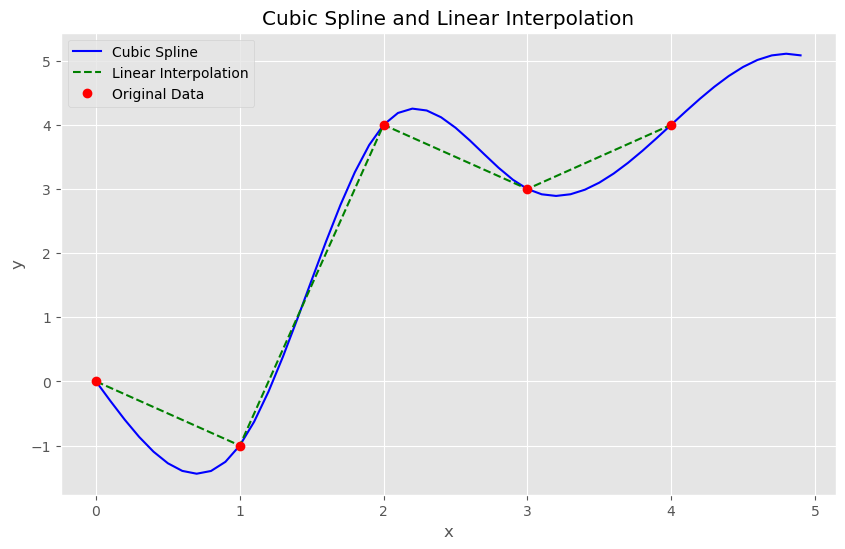

In [66]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, -1, 4, 3, 4])

result_function = cubic_spline(x, y)
x_new = np.arange(0, 5, 0.1)
y_new = np.array([result_function(i) for i in x_new])

y_new_linear = np.array([linear_interpolation(x, y, point) for point in x_new])

fig = plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, "b", label="Cubic Spline")
plt.plot(x_new, y_new_linear, "g--", label="Linear Interpolation") 
plt.plot(x, y, "ro", label="Original Data")
plt.title("Cubic Spline and Linear Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

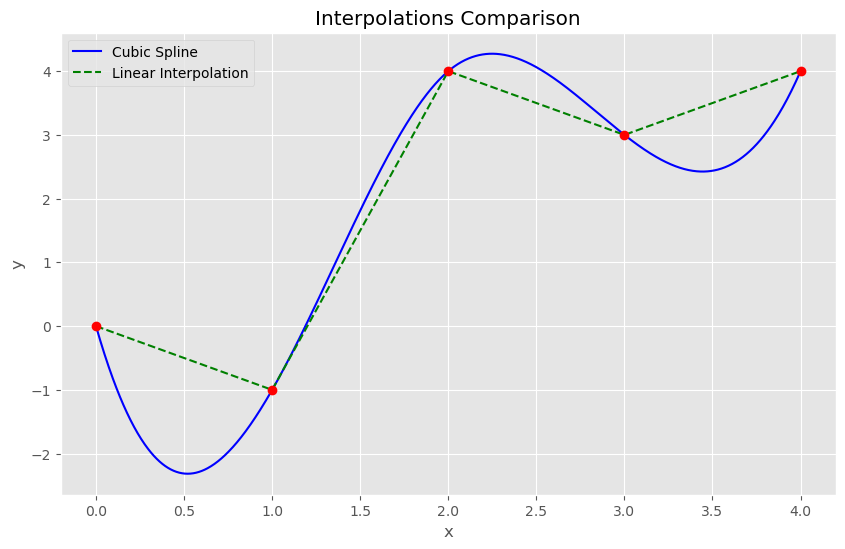

In [68]:
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2, 3, 4])
y = np.array([0, -1, 4, 3, 4])

cs = CubicSpline(x, y)

linear_interp = np.interp(x, x, y)

# Генерация значений для более плавного графика
x_new = np.linspace(0, 4, 1000)  
y_new = cs(x_new)

fig = plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, "b", label="Cubic Spline")
plt.plot(x, linear_interp, "g--", label="Linear Interpolation") 
plt.plot(x, y, "ro")
plt.title("Interpolations Comparison")
plt.grid()
plt.xlabel("x")
plt.grid(True)
plt.ylabel("y")
plt.legend()
plt.show()